In [1]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, TfidfTransformer
from sklearn.datasets import load_files
import pandas as pd
import numpy as np
from function import str_to_list
import re

In [2]:
from wordcloud import WordCloud
from pythainlp.corpus import thai_stopwords
th_stop_origin = tuple(thai_stopwords())

In [3]:
df = pd.read_csv('csv/new_data.csv')

Data Preparation

In [5]:
def text_process(text):
    text = re.sub("\[|\]|'|,"," ",text).replace(" ", "")
    return text
def text_process_save_comma(text): ##save ,
    text = re.sub("\[|\]|'|"," ",text).replace(" ", "")
    text = re.sub(r'[0-9]+'," ",text).replace(" ", "")
    return text
    
# df['text_replace'] = df['text'].apply(text_process)
df['text_replace'] = df['text'].apply(text_process_save_comma)
df

,post_type,text,text_replace
0,2,"['หา', 'สัญญา', 'หอ', 'มจพ', 'ย้าย', 'ปลาย', '...","หา,สัญญา,หอ,มจพ,ย้าย,ปลาย,พฤศ,จิ,ธันวา,เรท,ราค..."
1,1,"['ขาย', 'ตั๋วหนัง', 'black', 'panther', 'โรง',...","ขาย,ตั๋วหนัง,black,panther,โรง,เมเจอร์,gateway..."
2,1,"['อนุญาต', 'ขาย', 'ขาย', 'ตู้', 'เย็น', 'Midea...","อนุญาต,ขาย,ขาย,ตู้,เย็น,Midea,,q,,บาท,ขาย,เครื..."
3,1,"['XX', 'คน', 'เช่า', 'XX', 'อนุญาต', 'ประกาศ',...","XX,คน,เช่า,XX,อนุญาต,ประกาศ,ประชาสัมพันธ์,สำหร..."
4,1,"['ขาย', 'สัญญา', 'หอ', 'หมู่บ้าน', 'สิ', 'ริน'...","ขาย,สัญญา,หอ,หมู่บ้าน,สิ,ริน,,ห้อง,ชั้น,,,ห้อง..."
...,...,...,...
1676,1,"['ขาย', 'สัญญา', 'S9', 'Residence', 'ชั้น', '9...","ขาย,สัญญา,S,Residence,ชั้น,,ห้อง,,ต้น,เดือน,กุ..."
1677,2,"['แนว', 'ข้อ', 'สอบ', 'รอบ', 'สอบตรง', 'สำหรับ...","แนว,ข้อ,สอบ,รอบ,สอบตรง,สำหรับ,ปวส,รู้,ข้อ,สอบ,..."
1678,0,"['คน', 'ลืม', 'ศาลยีราฟ', 'ฝาก', 'ร้าน', 'ถ่าย...","คน,ลืม,ศาลยีราฟ,ฝาก,ร้าน,ถ่าย,เอกสาร,ริม,น้ำ"
1679,2,"['พี่', 'คน', 'รอบ', '2', 'สอบ', 'ข้อ', 'แนะนำ...","พี่,คน,รอบ,,สอบ,ข้อ,แนะนำ,สอบ,คณิต,อังกฤษ,Bms,คับ"


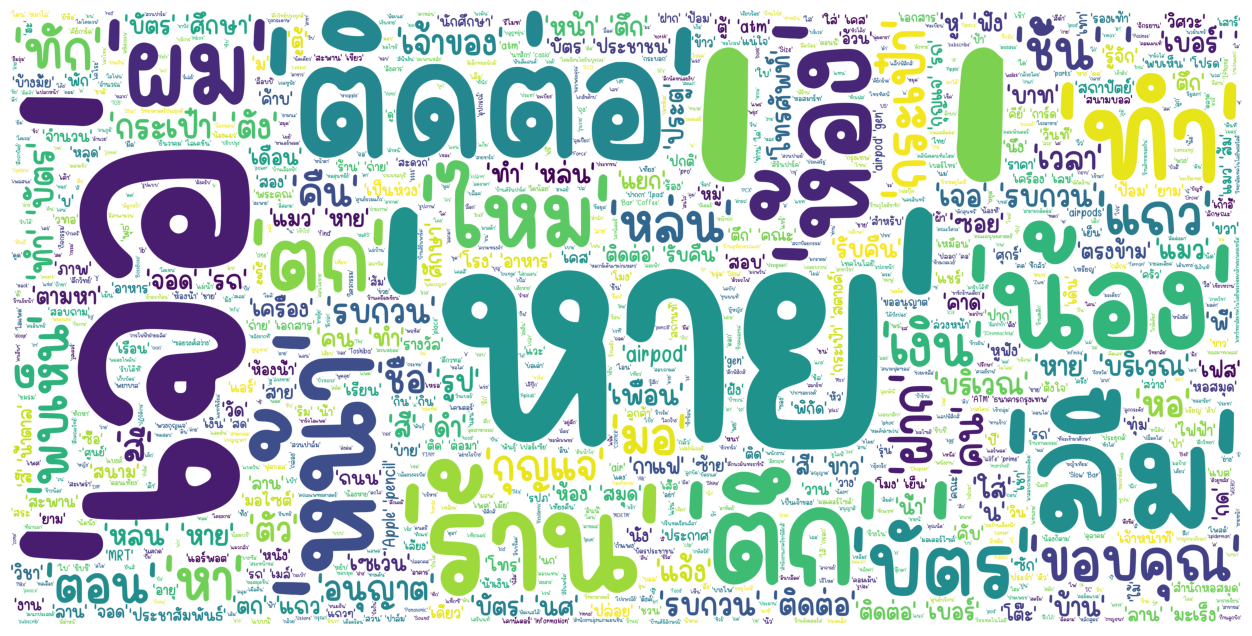

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
df_pos = df[df['post_type'] == 0]
pos_word_all = " ".join(text for text in df_pos['text'])
reg = r"[ก-๙a-zA-Z']+"
fp = 'content\Ethan.ttf'
wordcloud = WordCloud(stopwords=th_stop_origin, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

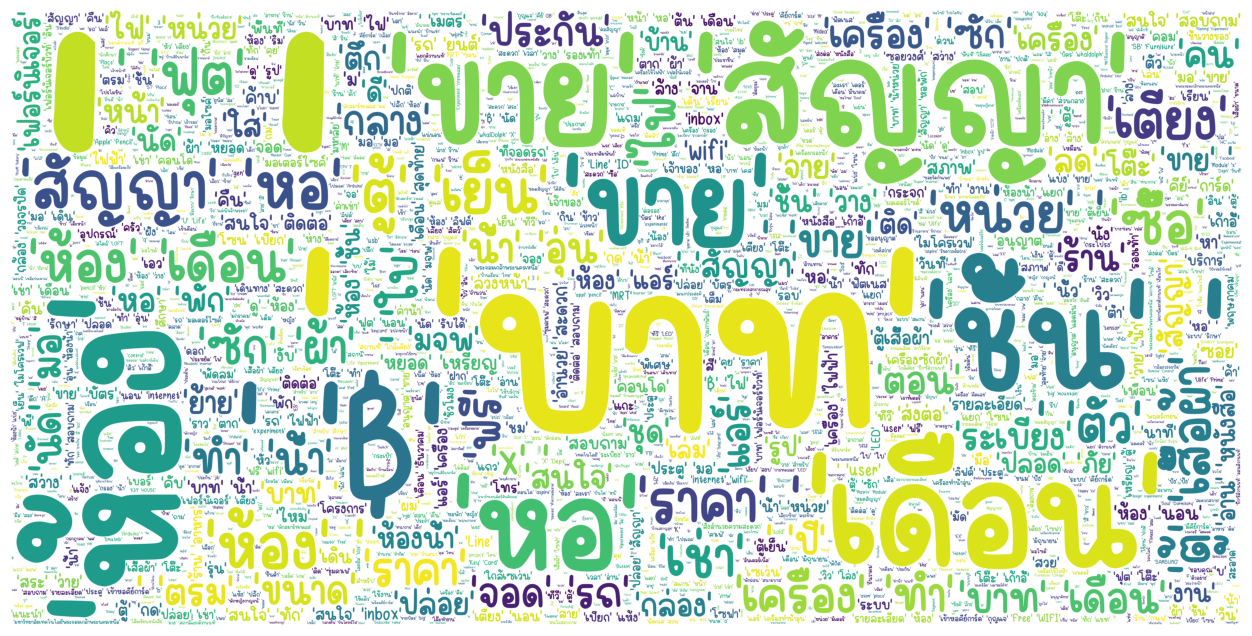

In [16]:
df_pos = df[df['post_type'] == 1]
pos_word_all = " ".join(text for text in df_pos['text'])
reg = r"[ก-๙a-zA-Z']+"
fp = 'content\Ethan.ttf'
wordcloud = WordCloud(stopwords=th_stop_origin, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

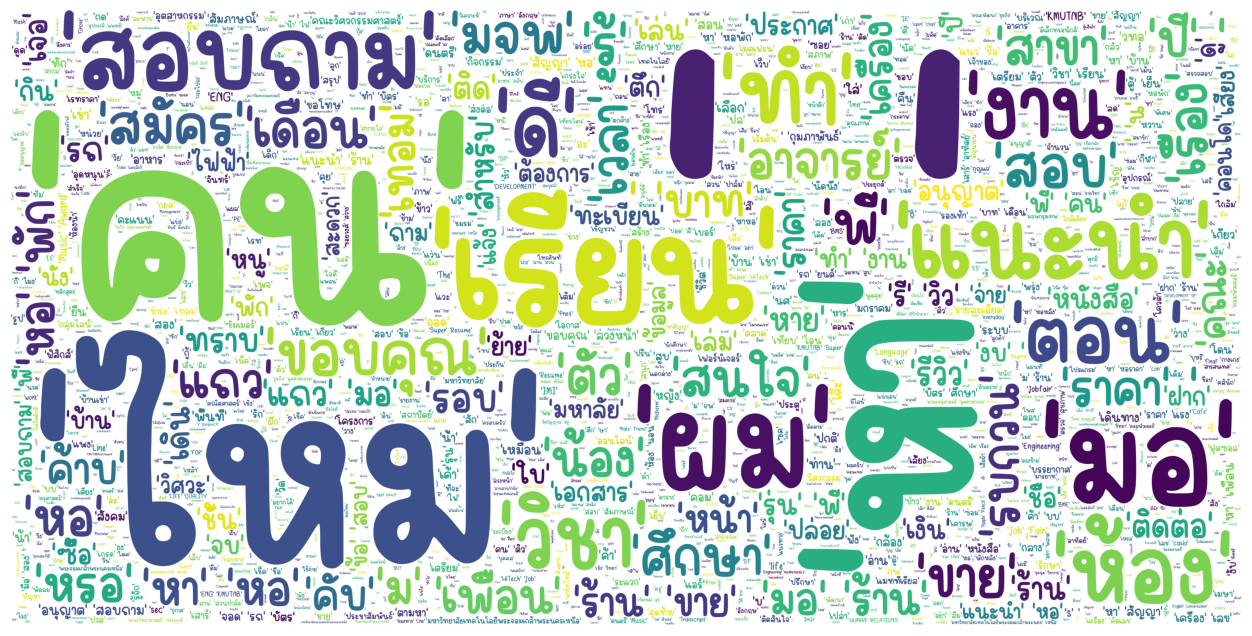

In [17]:
df_pos = df[df['post_type'] == 2]
pos_word_all = " ".join(text for text in df_pos['text'])
reg = r"[ก-๙a-zA-Z']+"
fp = 'content\Ethan.ttf'
wordcloud = WordCloud(stopwords=th_stop_origin, background_color = 'white', max_words=2000, height = 2000, width=4000, font_path=fp, regexp=reg).generate(pos_word_all)
plt.figure(figsize = (16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [6]:
X = df['text_replace']
# X = df['text']
y = df["post_type"]

In [7]:
df["text"][1676]

"['ขาย', 'สัญญา', 'S9', 'Residence', 'ชั้น', '9', 'ห้อง', '6900', 'ต้น', 'เดือน', 'กุมภาพันธ์', 'สนใจสอบถาม']"

In [8]:
X[1676]

'ขาย,สัญญา,S,Residence,ชั้น,,ห้อง,,ต้น,เดือน,กุมภาพันธ์,สนใจสอบถาม'

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)

In [10]:
total = df.shape[0]
train = X_train.shape[0]
test = X_test.shape[0]
print(f"Split train 75% test 25%\nTotal datasets : {total}\nTrain datasets : {train}\nTest datasets : {test}")

Split train 75% test 25%
Total datasets : 1681
Train datasets : 1260
Test datasets : 421


**Built model**

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
def word_split(text):
    words = re.split(r",",text)
    return words
vectorizer = CountVectorizer(analyzer=word_split,
                             tokenizer=None,
                             preprocessor=None,
                             stop_words=None,
                             max_features=5000,
                             ngram_range=(1, 2))
c_feat = vectorizer.fit_transform(X_train)

In [13]:
vectorizer.vocabulary_

{'ปล่อย': 1829,
 'หนังสือ': 2771,
 'ชื่อ': 1237,
 'เกีอบ': 3109,
 'เล่ม': 3385,
 'สภาพ': 2595,
 'แทบ': 3484,
 'รอย': 2273,
 'ยกเว้น': 2205,
 'วิชา': 2492,
 'อังกฤษ': 3013,
 '': 0,
 'บาท': 1717,
 'ม': 2052,
 'ราคา': 2301,
 'มหาลัย': 2081,
 'เรียน': 3360,
 'จันทร์บ่าย': 1149,
 'อังคาร': 3014,
 'พุธ': 2003,
 'พฤหัส': 1931,
 'math': 596,
 'อ': 2960,
 'สุรางค์': 2733,
 'gen': 524,
 'apple': 408,
 'pencil': 626,
 'ไหม': 3765,
 'หอสมุดชั้น': 2871,
 'วาน': 2489,
 'ห้อง': 2949,
 'หอสมุด': 2870,
 'ถาม': 1481,
 'คน': 982,
 'เจอ': 3172,
 'ยื่น': 2236,
 'กู้': 890,
 'กยศ': 774,
 'ทำ': 1530,
 'เอกสาร': 3432,
 'ดู': 1347,
 'เพจ': 3290,
 'งง': 1111,
 'พี่': 1982,
 'แนะนำ': 3492,
 'English': 107,
 'conversation': 458,
 's': 663,
 'อาจารย์': 3030,
 'david': 470,
 'คณะ': 966,
 'สาขา': 2669,
 'เจ้าของ': 3175,
 'เซคหรอคะ': 3195,
 'ใก้': 3700,
 'ล': 2390,
 'ศึกษา': 2544,
 'พัก': 1950,
 'หอ': 2842,
 'ดรปริญญา': 1308,
 'ติดต่อ': 1431,
 'ป้า': 1870,
 'กัญญา': 841,
 'แอร์': 3585,
 'พัด': 1964,
 'ลม': 2397,
 'แถ

In [14]:
c_feat[:,:20].todense()

matrix([[8, 0, 0, ..., 0, 0, 0],
        [2, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [283]:
from sklearn.naive_bayes import MultinomialNB
cls = MultinomialNB(alpha=1.0, fit_prior=True)
# transform the list of text to tf-idf before passing it to the model
cls.fit(vectorizer.transform(X_train), y_train)
 
from sklearn.metrics import classification_report, accuracy_score
 
y_pred = cls.predict(vectorizer.transform(X_test))
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8978622327790974
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        68
           1       0.80      0.93      0.86       123
           2       0.95      0.86      0.90       230

    accuracy                           0.90       421
   macro avg       0.90      0.92      0.91       421
weighted avg       0.90      0.90      0.90       421



In [113]:
col_name = ["Predict"]
dframe_train = y_train[:421].reset_index().drop(columns=["index"])

dframe_train

,post_type
0,1
1,0
2,2
3,2
4,1
...,...
416,2
417,1
418,2
419,2


In [53]:
y_pred

array([2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 2, 2, 1,
       2, 1, 2, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1, 1, 2,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 0, 2, 1,
       2, 1, 2, 0, 1, 2, 2, 1, 2, 0, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 0,
       1, 2, 2, 2, 2, 0, 1, 2, 2, 1, 2, 1, 0, 2, 2, 0, 1, 1, 1, 2, 2, 2,
       2, 0, 2, 2, 2, 1, 1, 0, 2, 1, 0, 1, 1, 0, 2, 0, 2, 1, 2, 1, 1, 2,
       2, 2, 1, 2, 2, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 0, 1, 0, 2, 0, 1, 1,
       1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 0, 0, 2, 1, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 1, 1, 0, 2, 1, 0, 2, 2, 0, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 1, 0, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 2, 2, 2, 2, 2, 2, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 1, 2,
       2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 0,
       1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1,

In [114]:
col_name = ["Predict"]
dframe_pred = pd.DataFrame(data=y_pred,columns = col_name)
dframe_pred

,Predict
0,2
1,0
2,1
3,2
4,2
...,...
416,1
417,2
418,2
419,2


In [55]:
import joblib

filename = "./model/check_type.sav"
filenamevec = "./model/count_vectorizer.sav"

joblib.dump(cls,open(filename,"wb"))
joblib.dump(vectorizer,open(filenamevec,"wb"))

In [115]:
confusion = pd.concat(
    [dframe_train,dframe_pred], axis="columns"
 )
confusion

,post_type,Predict
0,1,2
1,0,0
2,2,1
3,2,2
4,1,2
...,...,...
416,2,1
417,1,2
418,2,2
419,2,2


In [271]:
from sklearn.metrics import confusion_matrix
confusionmuu = confusion_matrix(y_test, y_pred)

In [272]:
confusionmuu

array([[ 66,   0,   2],
       [  0, 114,   9],
       [  4,  28, 198]], dtype=int64)

In [273]:
size = confusion.shape[0]
confu_list= [[0,0,0],
                    [0,0,0],
                    [0,0,0]]
for data in range(size):
    for i in range(0,3):
        for j in range(0,3):
            if confusion["Predict"][data]== i and confusion['post_type'][data]== j:
                confu_list[i][j]+=1

confu_list=[[ 66,   0,   2],
       [  0, 114,   9],
       [  4,  28, 198]]

In [274]:
confu_list

[[66, 0, 2], [0, 114, 9], [4, 28, 198]]

In [284]:
print(f"\t\t\t\t\t\t\tTrue class\n\t\t\t\t\t   ของหาย\t\tซื้อ-ขาย\t\tไม่เกี่ยวข้อง\n\t\t\tของหาย\t\t {confu_list[0][0]}\t\t\t   {confu_list[0][1]}\t\t\t\t{confu_list[0][2]}\nPredict class\tซื้อ-ขาย\t\t {confu_list[1][0]}\t\t\t   {confu_list[1][1]}\t\t\t{confu_list[1][2]}\n\t\t\tไม่เกี่ยวข้อง\t {confu_list[2][0]}\t\t\t   {confu_list[2][1]}\t\t\t\t{confu_list[2][2]}")

							True class
					   ของหาย		ซื้อ-ขาย		ไม่เกี่ยวข้อง
			ของหาย		 66			   0				2
Predict class	ซื้อ-ขาย		 0			   114			9
			ไม่เกี่ยวข้อง	 4			   28				198


In [276]:
tp0=confu_list[0][0]
tn0=confu_list[1][1]+confu_list[1][2]+confu_list[2][1]+confu_list[2][2]
fp0=confu_list[0][1]+confu_list[0][2]
fn0=confu_list[1][0]+confu_list[2][0]

tp1=confu_list[1][1]
tn1=confu_list[0][0]+confu_list[0][2]+confu_list[2][0]+confu_list[2][2]
fp1=confu_list[1][0]+confu_list[1][2]
fn1=confu_list[0][1]+confu_list[2][1]

tp2=confu_list[2][2]
tn2=confu_list[0][0]+confu_list[0][1]+confu_list[1][0]+confu_list[1][1]
fp2=confu_list[2][0]+confu_list[2][1]
fn2=confu_list[0][2]+confu_list[1][2]
print(f"ของหาย TP:{tp0} TN:{tn0} FP:{fp0} FN:{fn0}")
print(f"ซื้อ-ขาย TP:{tp1} TN:{tn1} FP:{fp1} FN:{fn1}")
print(f"ไม่เกี่ยวข้อง TP:{tp2} TN:{tn2} FP:{fp2} FN:{fn2}")

ของหาย TP:66 TN:349 FP:2 FN:4
ซื้อ-ขาย TP:114 TN:270 FP:9 FN:28
ไม่เกี่ยวข้อง TP:198 TN:180 FP:32 FN:11


In [281]:
def accuracy(tp,tn,fp,fn):
    return float("{:.2f}".format((tp+tn)/(tp+tn+fp+fn)))
def precision(tp,fp):
    return float("{:.2f}".format(tp/(tp+fp)))
def recall(tp,fn):
    return float("{:.2f}".format(tp/(tp+fn)))
def f1_score(preci,recall):
    return float("{:.2f}".format(2*((preci*recall)/(preci+recall))))
acc0=accuracy(tp0,tn0,fp0,fn0)
acc1=accuracy(tp1,tn1,fp1,fn1)
acc2=accuracy(tp2,tn2,fp2,fn2)

0.9333333333333332


In [286]:
print(f"class \t\tprecision \t\trecall \t\tf1-score")
print(f"ของหาย \t\t\t{precision(tp0,fp0)} \t\t{recall(tp0,fn0)} \t\t{f1_score(precision(tp0,fp0),recall(tp0,fn0))}")
print(f"ซื้อ-ขาย \t\t\t{precision(tp1,fp1)} \t\t{recall(tp1,fn1)} \t\t\t{f1_score(precision(tp1,fp1),recall(tp1,fn1))}")
print(f"ไม่เกี่ยวข้อง \t\t{precision(tp2,fp2)} \t\t{recall(tp2,fn2)} \t\t{f1_score(precision(tp2,fp2),recall(tp2,fn2))}")

class 		precision 		recall 		f1-score
ของหาย 			0.97 		0.94 		0.95
ซื้อ-ขาย 			0.93 		0.8 			0.86
ไม่เกี่ยวข้อง 		0.86 		0.95 		0.9

Accuracy 0.9333333333333332
